In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Computing the truncated Fourier series

Consider the function $f(x) = \frac{\pi -x}{2}$, sampled at $4$ evenly spaced points 
$$ x_0=0, \quad x_1 = \frac{\pi}{2}, \quad x_2 = \pi, \quad x_3 = \frac{3\pi}{2}. $$
The function values at these points are given by 
$$f_0 = \frac{\pi}{2}, \quad f_1 = \frac{\pi}{4}, \quad f_2 =0, \quad f_3 = -\frac{\pi}{4}.$$


In [2]:
n = 4
xs = np.arange(4)*(2*np.pi/n)
f = lambda x: (np.pi-x)/2.

Text(0, 0.5, 'f(x)')

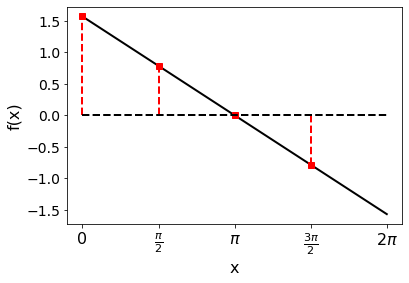

In [3]:
x = np.linspace(0,2*np.pi)

fs = f(xs)
plt.plot(x,f(x), 'k-', xs, fs, 'rs', lw = 2)
for x in list(xs):
    plt.plot(x*np.ones((50,)), np.linspace(0,1)*f(x), 'r--', lw = 2)

plt.axis('tight')
x = np.linspace(0,2*np.pi)
plt.plot(x,0*x,'k--', lw = 2)
plt.xticks(np.arange(5)*2*np.pi/4,(r'0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'), fontsize = 16)
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

## Plotting the Fourier interpolant

After solving for the Fourier coefficients, we have the Fourier interpolant 
$$\begin{aligned}
p_4(x) = & \>  c_0 + c_1e^{ix} + c_{-2}e^{-2ix} + c_{-1}e^{-ix} \\ 
= & \> \frac{\pi}{8} \left( 1 + (1-i)e^{ix} + e^{-2ix} + (1+i)e^{-ix} \right).
\end{aligned}$$


Text(0.5, 1.0, 'Interpolated function')

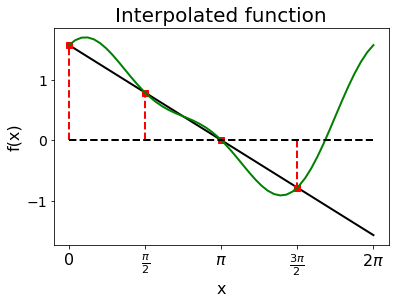

In [4]:
x = np.linspace(0,2*np.pi)
c = np.array([1,1-1j,1.,1+1j])*np.pi/8
k = np.array([0.,1.,-2.,-1.])
fint = 0*1j*x ;
for j in range(4):
    fint += c[j]*np.exp(1j*k[j]*x)
    
plt.plot(x,f(x), 'k-', xs, fs, 'rs', x, np.real(fint), 'g-', lw = 2)
for x in list(xs):
    plt.plot(x*np.ones((50,)), np.linspace(0,1)*f(x), 'r--', lw = 2)
    
plt.axis('tight')
x = np.linspace(0,2*np.pi)
plt.plot(x,0*x,'k--', lw = 2)
plt.xticks(np.arange(5)*2*np.pi/4,(r'0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'), fontsize = 16)
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.title('Interpolated function', fontsize = 20)

### Implementation using DFT

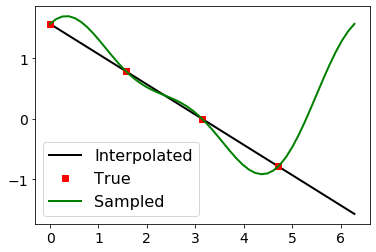

In [5]:
n = 4
xs = np.arange(n)*(2*np.pi/n)
fs = f(xs)

fk = np.fft.fft(fs)/float(n)      # This is slightly different than our definition.
ck = np.fft.fftshift(fk)
k  = np.arange(-n/2,n/2)

x = np.linspace(0,2*np.pi)
fint = 0*1j*x ;
for j in range(n):
    fint += ck[j]*np.exp(1j*k[j]*x)
    
plt.plot(x,f(x), 'k-', xs, fs, 'rs', x, np.real(fint), 'g-', lw = 2)
plt.legend({'True','Sampled','Interpolated'}, fontsize = 16)

### Plot the coefficients

Since the signal $f(x)$ is real, the Fourier coefficients have a certain symmetry. The real parts are symmetric about the middle frequency, whereas the imaginary parts are antisymmetric about the middle frequency.


Text(0.5, 1.0, 'Imaginary part of $c_k$')

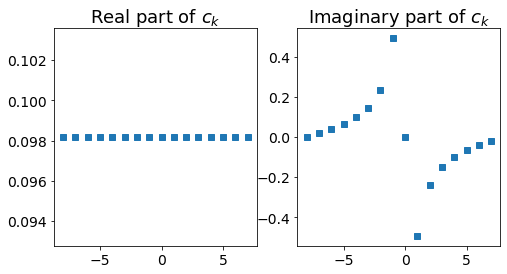

In [6]:
n = 16

xs = np.arange(n)*(2*np.pi/n)
fs = f(xs)

fk = np.fft.fft(fs)/float(n)      # This is slightly different than our definition.
ck = np.fft.fftshift(fk)
k  = np.arange(-n/2,n/2)


fig,(ax1,ax2) = plt.subplots(1,2, figsize = (8,4))
ks = np.fft.fftshift(k)
ax1.plot(ks, np.real(fk), 's')
ax1.set_title('Real part of $c_k$', fontsize = 18)
ax2.plot(ks, np.imag(fk), 's')
ax2.set_title('Imaginary part of $c_k$', fontsize = 18)

### Results with different number of samples.

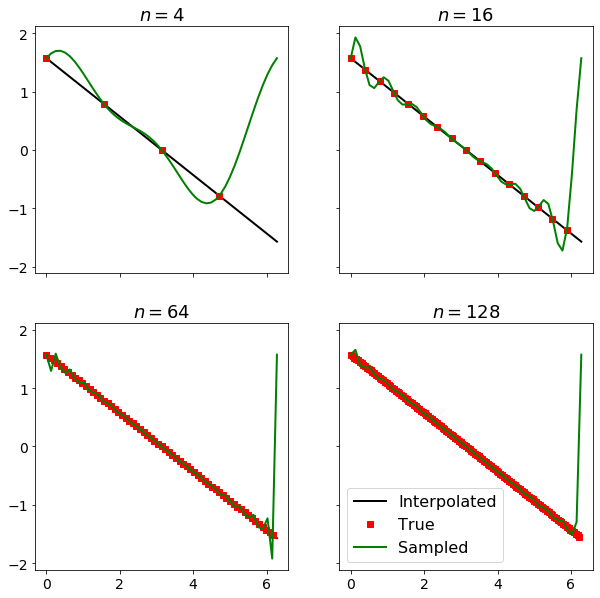

In [7]:
fig, axarray = plt.subplots(2,2, sharex = True, sharey = True, figsize = (10,10))
nlst = [4,16,64,128]

for n, ax in zip(nlst, axarray.flatten()):
    xs = np.arange(n)*(2*np.pi/n)
    fs = f(xs)

    fk = np.fft.fft(fs)/n      # This is slightly different than our definition.
    ck = np.fft.fftshift(fk)
    k  = np.arange(-n/2,n/2)

    x = np.linspace(0,2*np.pi)
    fint = 0*1j*x ;
    for j in range(n):
        fint += ck[j]*np.exp(1j*k[j]*x)
    ax.plot(x,f(x), 'k-', xs, fs, 'rs', x, np.real(fint), 'g-', lw = 2)
    ax.set_title('$n = $' + str(n), fontsize = 18)
ax.legend({'True','Sampled','Interpolated'}, fontsize = 16)

### Results for a smoother function

We repeat this exercise for $f(x) = (x-\pi)^2$ and $f(x) = \cos(3x)$

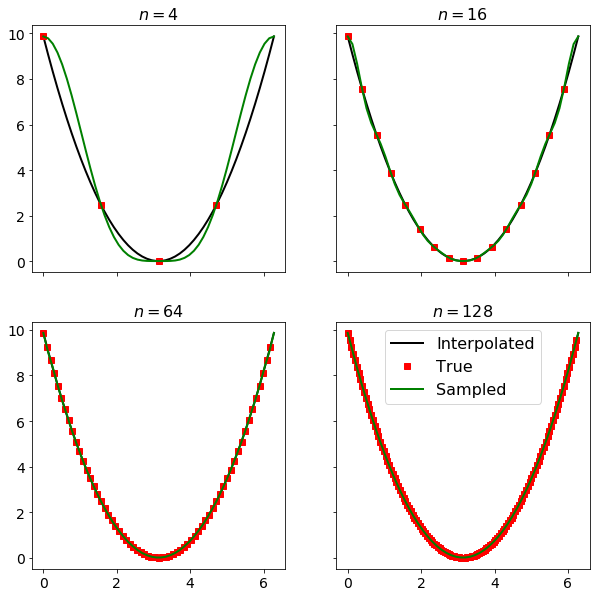

In [8]:
fig, axarray = plt.subplots(2,2, sharex = True, sharey = True, figsize = (10,10))
nlst = [4,16,64,128]
f = lambda x: (np.pi-x)**2.

for n, ax in zip(nlst, axarray.flatten()):
    xs = np.arange(n)*(2*np.pi/n)
    fs = f(xs)

    fk = np.fft.fft(fs)/n      # This is slightly different than our definition.
    ck = np.fft.fftshift(fk)
    k  = np.arange(-n/2,n/2)

    x = np.linspace(0,2*np.pi)
    fint = 0*1j*x ;
    for j in range(n):
        fint += ck[j]*np.exp(1j*k[j]*x)
    ax.plot(x,f(x), 'k-', xs, fs, 'rs', x, np.real(fint), 'g-', lw = 2)
    ax.set_title('$n = $' + str(n), fontsize = 16)
ax.legend({'True','Sampled','Interpolated'}, fontsize = 16)

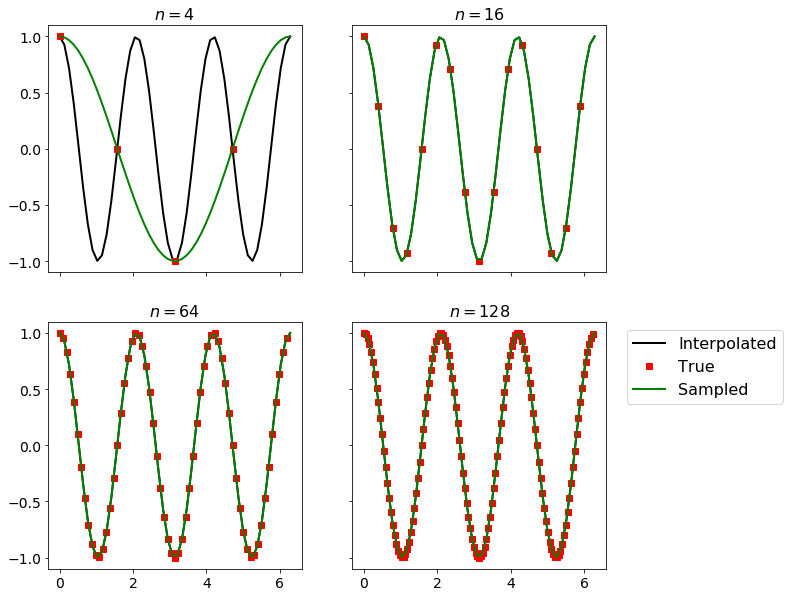

In [9]:
fig, axarray = plt.subplots(2,2, sharex = True, sharey = True, figsize = (10,10))
nlst = [4,16,64,128]
f = lambda x: np.cos(3*x)

for n, ax in zip(nlst, axarray.flatten()):
    xs = np.arange(n)*(2*np.pi/n)
    fs = f(xs)

    fk = np.fft.fft(fs)/n      # This is slightly different than our definition.
    ck = np.fft.fftshift(fk)
    k  = np.arange(-n/2,n/2)

    x = np.linspace(0,2*np.pi)
    fint = 0*1j*x ;
    for j in range(n):
        fint += ck[j]*np.exp(1j*k[j]*x)
    ax.plot(x,f(x), 'k-', xs, fs, 'rs', x, np.real(fint), 'g-', lw = 2)
    ax.set_title('$n = $' + str(n), fontsize = 16)
ax.legend({'True','Sampled','Interpolated'}, fontsize = 16, bbox_to_anchor=(1.05, 1))

### Comparing the computational cost of a DFT with FFT

The computational cost of DFT scales as $\sim 2n^2$, whereas the computational cost of FFT scales as $\sim \frac{34}{9}n \log_2(n)$.

Text(0.5, 1.0, 'Comparing the DFT with FFT')

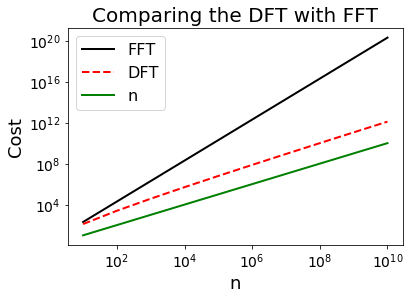

In [10]:
n = 10**np.arange(1,11)
dftc = 2*n**2.
fftc = (34./9)*n*np.log2(n)

plt.loglog(n,dftc, 'k-', n, fftc, 'r--', n, n, 'g-', lw = 2)
plt.legend({'DFT','FFT','n'}, fontsize = 16)
plt.xlabel('n', fontsize = 18)
plt.ylabel('Cost', fontsize = 18)
plt.title('Comparing the DFT with FFT', fontsize = 20)

### Differentiating Fourier interpolants

We can approximate the derivative of a function by differentiating the Fourier interpolant. This gives

$$ f'(x) \approx p_n'(x) = \sum_{k=-n/2}^{n/2-1}ik c_k e^{ikx}. $$


We try this on the two functions $f(x) = (\pi-x)^2$ and $f(x) = \cos(3x)$ 

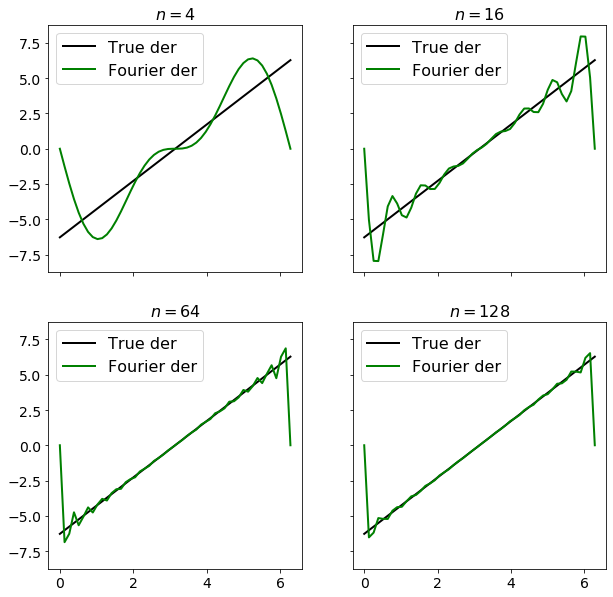

In [11]:
fig, axarray = plt.subplots(2,2, sharex = True, sharey = True, figsize = (10,10))
nlst = [4,16,64,128]
f  = lambda x: (np.pi-x)**2.
fp = lambda x: -2*(np.pi-x)

for n, ax in zip(nlst, axarray.flatten()):
    xs = np.arange(n)*(2*np.pi/n)
    fs = f(xs)

    fk = np.fft.fft(fs)/n      # This is slightly different than our definition.
    ck = np.fft.fftshift(fk)
    k  = np.arange(-n/2,n/2)

    x = np.linspace(0,2*np.pi)
    fint = 0*1j*x ;
    for j in range(n):
        fint += (1j*k[j]*ck[j])*np.exp(1j*k[j]*x)
    ax.plot(x,fp(x), 'k-',  x, np.real(fint), 'g-', lw = 2)
    ax.set_title('$n = $' + str(n), fontsize = 16)
    ax.legend({'True der', 'Fourier der'}, fontsize = 16)

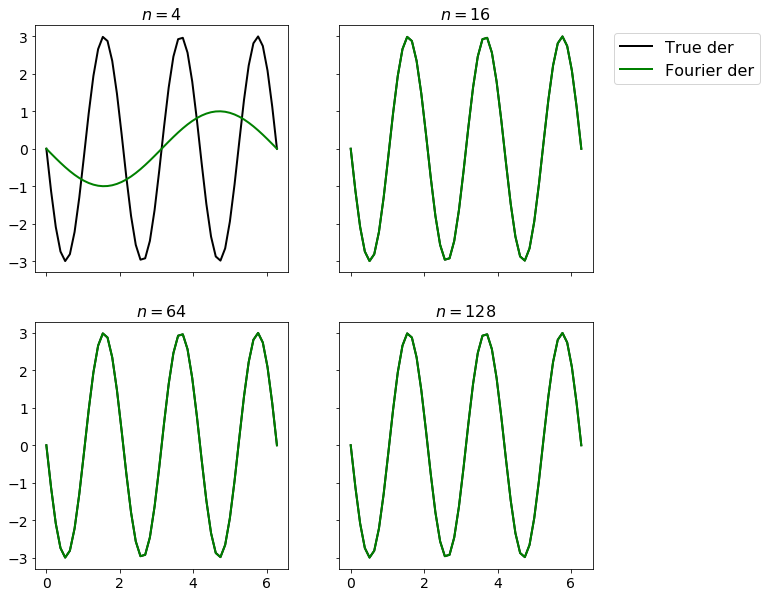

In [12]:
fig, axarray = plt.subplots(2,2, sharex = True, sharey = True, figsize = (10,10))
nlst = [4,16,64,128]
f  = lambda x: np.cos(3*x)
fp = lambda x: -3*np.sin(3*x)

for n, ax in zip(nlst, axarray.flatten()):
    xs = np.arange(n)*(2*np.pi/n)
    fs = f(xs)

    fk = np.fft.fft(fs)/n      # This is slightly different than our definition.
    ck = np.fft.fftshift(fk)
    k  = np.arange(-n/2,n/2)

    x = np.linspace(0,2*np.pi)
    fint = 0*1j*x ;
    for j in range(n):
        fint += (1j*k[j]*ck[j])*np.exp(1j*k[j]*x)
    ax.plot(x,fp(x), 'k-', x, np.real(fint), 'g-', lw = 2)
    ax.set_title('$n = $' + str(n), fontsize = 16)
    if n == 16:
        ax.legend({'True der', 'Fourier der'}, fontsize = 16, bbox_to_anchor=(1.05, 1))

### Spectral accuracy of derivatives

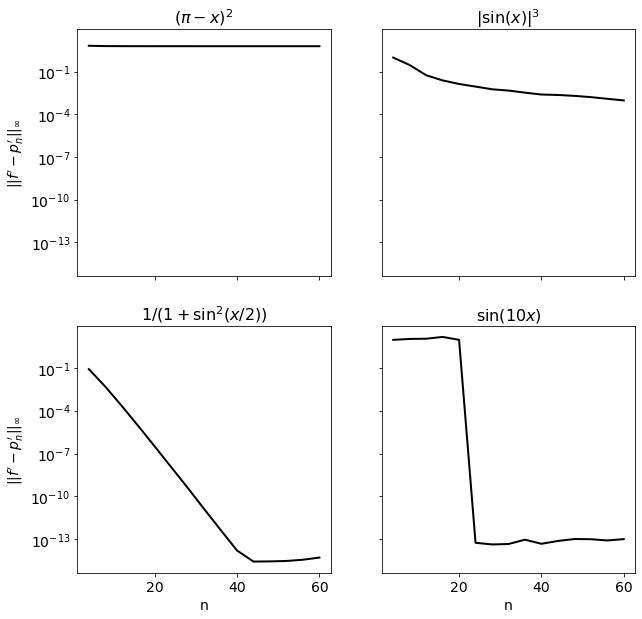

In [21]:
fig, axarray = plt.subplots(2,2, sharex = True, sharey = True, figsize = (10,10))
x = np.linspace(0,2*np.pi)

flst = [lambda x: (np.pi-x)**2., \
        lambda x: np.abs(np.sin(x))**3., \
        lambda x: 1/(1+ np.sin(x/2)**2.), \
        lambda x: np.sin(10*x)]


fder = [lambda x: -2*(np.pi-x), \
        lambda x: 3*np.sin(x)*np.cos(x)*np.abs(np.sin(x)), \
        lambda x: -np.sin(x/2)*np.cos(x/2)/(1+ np.sin(x/2)**2.)**2., \
        lambda x: 10*np.cos(10*x)]


tlst = ['$(\pi-x)^2$', '$|\sin(x)|^3$', '$1/(1+\sin^2(x/2))$', '$\sin(10x)$']

for i, ax in enumerate(axarray.flatten()):
    
    err = []
    for n in np.arange(4,64,4):
        xs = np.arange(n)*(2*np.pi/n)
    
        f  = flst[i]
        fp = fder[i]
        
        fs = f(xs)

        fk = np.fft.fft(fs)/n      # This is slightly different than our definition.
        ck = np.fft.fftshift(fk)
        k  = np.arange(-n/2,n/2)

        
        fdint = 0*1j*x 
        for j in range(n):
            fdint += (1j*k[j]*ck[j])*np.exp(1j*k[j]*x)
        fdapp = fder[i](x)
        err.append(np.linalg.norm(fdint-fdapp,np.inf))

    ax.semilogy(np.arange(4,64,4), err, 'k-', lw = 2)
    ax.set_title(tlst[i], fontsize = 16)
    if np.mod(i,2) == 0:
        ax.set_ylabel("$||f'-p_n'||_\infty$", fontsize = 14)
    if i == 2 or i == 3:
        ax.set_xlabel('n', fontsize = 14)


### Two spatial Dimensions

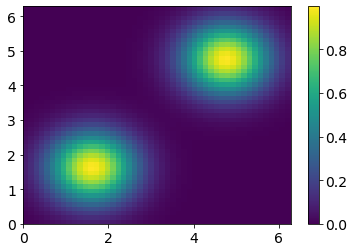

In [14]:
x = np.linspace(0,2*np.pi,)
X, Y = np.meshgrid(x,x)

f = lambda x, y: np.exp(-(x-np.pi/2)**2 - (y-np.pi/2)**2) + np.exp(-(x-3*np.pi/2)**2 - (y-3*np.pi/2)**2)
plt.pcolor(X,Y, f(X,Y))
plt.colorbar()

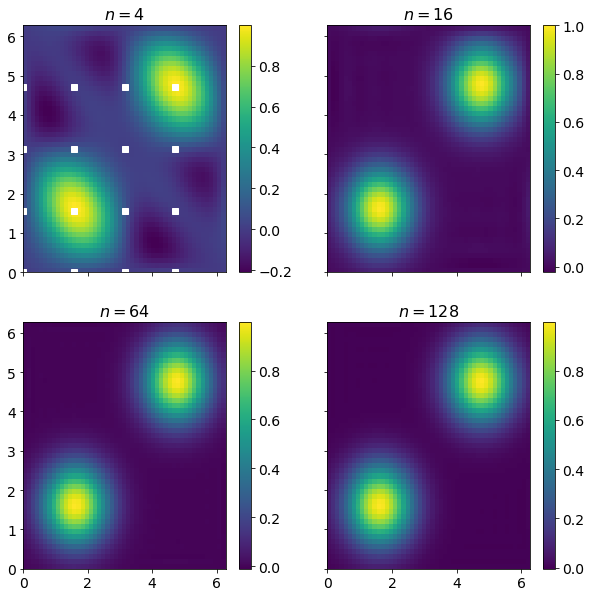

In [15]:
fig, axarray = plt.subplots(2,2, sharex = True, sharey = True, figsize = (10,10))
nlst = [4,16,64,128]


for n, ax in zip(nlst, axarray.flatten()):
    xs = np.arange(n)*(2*np.pi/n)
    Xs, Ys = np.meshgrid(xs,xs)
    fs = f(Xs,Ys)

    
    fk = np.fft.fft2(fs)/n**2.     
    ck = np.fft.fftshift(fk)
    k1 = np.arange(-n/2,n/2)
    K1, K2 = np.meshgrid(k1, k1)

    
    fint = 0*1j*X
    for i in range(n):
        for j in range(n):
            fint += ck[i,j]*np.exp(1j*k1[i]*X)*np.exp(1j*k1[j]*Y)
    cf = ax.pcolor(X,Y, np.real(fint))
    if n == 4: ax.plot(Xs,Ys, 'ws')
    ax.set_title('$n = $' + str(n), fontsize = 16)
    fig.colorbar(cf, ax = ax)

#### Derivative with respect to x

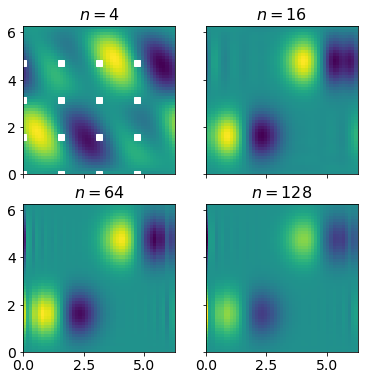

In [16]:
fig, axarray = plt.subplots(2,2, sharex = True, sharey = True, figsize = (6,6))
nlst = [4,16,64,128]


for n, ax in zip(nlst, axarray.flatten()):
    xs = np.arange(n)*(2*np.pi/n)
    Xs, Ys = np.meshgrid(xs,xs)
    fs = f(Xs,Ys)

    
    fk = np.fft.fft2(fs)/n     
    ck = np.fft.fftshift(fk)
    k1 = np.arange(-n/2,n/2)
    K1, K2 = np.meshgrid(k1, k1)

    
    fint = 0*1j*X
    for i in range(n):
        for j in range(n):
            fint += 1j*(k1[i])*ck[i,j]*np.exp(1j*k1[i]*X)*np.exp(1j*k1[j]*Y)
    ax.pcolor(X,Y, np.real(fint))
    if n == 4: ax.plot(Xs,Ys, 'ws')
    ax.set_title('$n = $' + str(n), fontsize = 16)